In [1]:
import fasttext
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import os
import numpy as np
from sklearn.metrics import accuracy_score, log_loss
from sklearn.utils import all_estimators

In [2]:
def transform_text(raw_text):
    emd = model.get_sentence_vector(raw_text)
    return emd


def transform_Xset(X_raw):
    X = []
    for text in X_raw:
        X.append(transform_text(text))
    X = np.asarray(X)
    return X


def transform_label(raw_label):
    return raw_label == 'HOF'


def transform_Yset(Y_raw):
    Y = []
    for label in Y_raw:
        Y.append(transform_label(label))
    Y = np.asarray(Y)
    return Y


def get_train_test_from_tsv(tsv_name):
    df = pd.read_csv(tsv_name,delimiter="\t")
    print("Dataset Shape: {}".format(df.shape))
    X_raw = df['text']
    Y_raw = df['task_1']
    X_ = transform_Xset(X_raw)
    Y_ = transform_Yset(Y_raw)
    del (df)
    del (X_raw)
    del (Y_raw)
    return X_, Y_


def get_all_classifiers():
    # CODE LINK: https://stackoverflow.com/a/63336419

    estimators = all_estimators(type_filter='classifier')
    ignore_estimators = set([
        'VotingClassifier', 'StackingClassifier', 'OutputCodeClassifier',
        'ClassifierChain', 'MultiOutputClassifier', 'OneVsOneClassifier',
        'OneVsRestClassifier', 'ComplementNB', 'MultinomialNB', 'Perceptron',
        'RidgeClassifierCV', 'RidgeClassifierCV', 'LogisticRegressionCV',
        'CalibratedClassifierCV'
    ])
    include_models = set([
    'AdaBoostClassifier','BaggingClassifier', 'BernoulliNB', 'KNeighborsClassifier', 'SVC',
    'RandomForestClassifier', 'LogisticRegression',
    'QuadraticDiscriminantAnalysis', 'MLPClassifier','DecisionTreeClassifier','LinearDiscriminantAnalysis'
])
    all_clfs = {}
    for name, ClassifierClass in estimators:
        if name in include_models:
            clf = ClassifierClass()
            all_clfs[name] = clf
    print("Total Classifer: {}".format(len(all_clfs)))
    return all_clfs

In [3]:
model_path = 'model'
data_path = 'hindi_dataset'

In [4]:
model = fasttext.load_model(os.path.join(model_path, 'indicnlp.ft.hi.300.bin'))
print(len(model.words))

327255


In [10]:
def save_embeddings():
    X_train, Y_train = get_train_test_from_tsv(os.path.join(data_path, 'hasoc_19_train.tsv'))
    X_test, Y_test = get_train_test_from_tsv(os.path.join(data_path, 'hasoc_19_gold.tsv'))
    file_name = os.path.join('results', "embedd_labels.npz")
    np.savez_compressed(file_name,
                            X_train=X_train,
                            X_test=X_test,
                            Y_train=Y_train,
                            Y_test=Y_test)
    
    
# loaded = np.load("embedd_labels.npz")
# X_train = loaded["X_train"]
# X_test = loaded["X_test"]
# Y_train = loaded["Y_train"]
# Y_test = loaded["Y_test"]

In [11]:
save_embeddings()

Dataset Shape: (4665, 5)
Dataset Shape: (1318, 5)


In [12]:
file_name = os.path.join('results', "embedd_labels.npz")    
loaded = np.load(file_name)
X_train = loaded["X_train"]
X_test = loaded["X_test"]
Y_train = loaded["Y_train"]
Y_test = loaded["Y_test"]

In [13]:
print("Train Size: {}".format(Y_train.shape[0]))
print("Val Size: {}".format(Y_test.shape[0]))

Train Size: 4665
Val Size: 1318


In [14]:
# X_train, Y_train = get_train_test_from_tsv(
#     os.path.join(data_path, 'hasoc_19_train.tsv'))
# X_train, X_val, Y_train, Y_val = train_test_split(X_train,
#                                                   Y_train,
#                                                   shuffle=True,
#                                                   test_size=0.1)
print("Train Size: {}".format(Y_train.shape[0]))
print("Val Size: {}".format(Y_val.shape[0]))

all_classifiers = get_all_classifiers()
counter = 1
for name in all_classifiers:
    print("\n\n\n----------MODEL TRAINING & VALIDATION-------")
    print("Counter: {}".format(counter))
    print("Name: {}".format(name))
    clf = all_classifiers[name]
    clf.probability=True
    clf.fit(X_train, Y_train)
    y_train_pred = clf.predict(X_train)
    y_val_pred = clf.predict(X_val)
    print("Train ACC: {:.5%}".format(accuracy_score(Y_train, y_train_pred)))
    print("Val ACC: {:.5%}".format(accuracy_score(Y_val, y_val_pred)))
    print("Train LL: {:.5}".format(log_loss(Y_val, y_val_pred)))
    print("Val LL: {:.5}".format(log_loss(Y_val, y_val_pred)))
    print("Confusion Matrix \n{}".format(confusion_matrix(Y_val, y_val_pred)))
    print("Classification Report \n{}".format(
        classification_report(Y_val, y_val_pred)))
    counter += 1

Dataset Shape: (4665, 5)
Train Size: 4198
Val Size: 467
Total Classifer: 11



----------MODEL TRAINING & VALIDATION-------
Counter: 1
Name: AdaBoostClassifier
Train ACC: 80.94331%
Val ACC: 79.65739%
Train LL: 7.0262
Val LL: 7.0262
Confusion Matrix 
[[171  42]
 [ 53 201]]
Classification Report 
              precision    recall  f1-score   support

       False       0.76      0.80      0.78       213
        True       0.83      0.79      0.81       254

    accuracy                           0.80       467
   macro avg       0.80      0.80      0.80       467
weighted avg       0.80      0.80      0.80       467




----------MODEL TRAINING & VALIDATION-------
Counter: 2
Name: BaggingClassifier
Train ACC: 98.66603%
Val ACC: 72.80514%
Train LL: 9.3929
Val LL: 9.3929
Confusion Matrix 
[[167  46]
 [ 81 173]]
Classification Report 
              precision    recall  f1-score   support

       False       0.67      0.78      0.72       213
        True       0.79      0.68      0.73      

/home/sarah/github/Offensive_Hindi/env1/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Train ACC: 84.68318%
Val ACC: 80.29979%
Train LL: 6.8043
Val LL: 6.8043
Confusion Matrix 
[[180  33]
 [ 59 195]]
Classification Report 
              precision    recall  f1-score   support

       False       0.75      0.85      0.80       213
        True       0.86      0.77      0.81       254

    accuracy                           0.80       467
   macro avg       0.80      0.81      0.80       467
weighted avg       0.81      0.80      0.80       467




----------MODEL TRAINING & VALIDATION-------
Counter: 9
Name: QuadraticDiscriminantAnalysis
Train ACC: 92.23440%
Val ACC: 82.44111%
Train LL: 6.0647
Val LL: 6.0647
Confusion Matrix 
[[168  45]
 [ 37 217]]
Classification Report 
              precision    recall  f1-score   support

       False       0.82      0.79      0.80       213
        True       0.83      0.85      0.84       254

    accuracy                           0.82       467
   macro avg       0.82      0.82      0.82       467
weighted avg       0.82      0.82 

In [15]:
X_test, Y_test = get_train_test_from_tsv(
    os.path.join(data_path, 'hasoc_19_gold.tsv'))
print("Test Size: {}".format(Y_test.shape[0]))
counter = 1
for name in all_classifiers:
    print("\n\n\n----------MODEL TESTING-------")
    print("Counter: {}".format(counter))
    print("Name: {}".format(name))
    clf = all_classifiers[name]
    y_test_pred = clf.predict(X_test)
    print("Test ACC: {:.5%}".format(accuracy_score(Y_test, y_test_pred)))
    print("Test LL: {:.5}".format(log_loss(Y_test, y_test_pred)))
    print("Confusion Matrix \n{}".format(confusion_matrix(Y_test,
                                                          y_test_pred)))
    print("Classification Report \n{}".format(
        classification_report(Y_test, y_test_pred)))
    counter += 1

Dataset Shape: (1318, 5)
Test Size: 1318



----------MODEL TESTING-------
Counter: 1
Name: AdaBoostClassifier
Test ACC: 74.96206%
Test LL: 8.6479
Confusion Matrix 
[[511 202]
 [128 477]]
Classification Report 
              precision    recall  f1-score   support

       False       0.80      0.72      0.76       713
        True       0.70      0.79      0.74       605

    accuracy                           0.75      1318
   macro avg       0.75      0.75      0.75      1318
weighted avg       0.76      0.75      0.75      1318




----------MODEL TESTING-------
Counter: 2
Name: BaggingClassifier
Test ACC: 75.26555%
Test LL: 8.5431
Confusion Matrix 
[[535 178]
 [148 457]]
Classification Report 
              precision    recall  f1-score   support

       False       0.78      0.75      0.77       713
        True       0.72      0.76      0.74       605

    accuracy                           0.75      1318
   macro avg       0.75      0.75      0.75      1318
weighted avg       0.

In [16]:
from sklearn.svm import SVC
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
C = [1, 0.5, 0.3, 0.1, 0.01, 0.001]
# kernels=['poly']
# C = [0.01]
for c in C:
    for k in kernels:
        print("\n\n\nKernel: {} C: {}".format(k, c))
        print("----------MODEL TRAINING & VALIDATION-------")
        clf = SVC(kernel=k, C=c, probability=True)
        clf.fit(X_train, Y_train)
        y_train_pred = clf.predict(X_train)
        y_val_pred = clf.predict(X_val)
        print("Train ACC: {:.5%}".format(accuracy_score(Y_train,
                                                        y_train_pred)))
        print("Val ACC: {:.5%}".format(accuracy_score(Y_val, y_val_pred)))
        print("Train LL: {:.5}".format(log_loss(Y_val, y_val_pred)))
        print("Val LL: {:.5}".format(log_loss(Y_val, y_val_pred)))
        print("Confusion Matrix \n{}".format(
            confusion_matrix(Y_val, y_val_pred)))
        print("Classification Report \n{}".format(
            classification_report(Y_val, y_val_pred)))
        print("----------MODEL TESTING-------")
        y_test_pred = clf.predict(X_test)
        print("Test ACC: {:.5%}".format(accuracy_score(Y_test, y_test_pred)))
        print("Test LL: {:.5}".format(log_loss(Y_test, y_test_pred)))
        print("Confusion Matrix \n{}".format(
            confusion_matrix(Y_test, y_test_pred)))
        print("Classification Report \n{}".format(
            classification_report(Y_test, y_test_pred)))




Kernel: linear C: 1
----------MODEL TRAINING & VALIDATION-------
Train ACC: 80.25250%
Val ACC: 80.72805%
Train LL: 6.6564
Val LL: 6.6564
Confusion Matrix 
[[178  35]
 [ 55 199]]
Classification Report 
              precision    recall  f1-score   support

       False       0.76      0.84      0.80       213
        True       0.85      0.78      0.82       254

    accuracy                           0.81       467
   macro avg       0.81      0.81      0.81       467
weighted avg       0.81      0.81      0.81       467

----------MODEL TESTING-------
Test ACC: 79.89378%
Test LL: 6.9445
Confusion Matrix 
[[562 151]
 [114 491]]
Classification Report 
              precision    recall  f1-score   support

       False       0.83      0.79      0.81       713
        True       0.76      0.81      0.79       605

    accuracy                           0.80      1318
   macro avg       0.80      0.80      0.80      1318
weighted avg       0.80      0.80      0.80      1318




Kernel: 

Test ACC: 75.03794%
Test LL: 8.6217
Confusion Matrix 
[[481 232]
 [ 97 508]]
Classification Report 
              precision    recall  f1-score   support

       False       0.83      0.67      0.75       713
        True       0.69      0.84      0.76       605

    accuracy                           0.75      1318
   macro avg       0.76      0.76      0.75      1318
weighted avg       0.77      0.75      0.75      1318




Kernel: poly C: 0.3
----------MODEL TRAINING & VALIDATION-------
Train ACC: 82.75369%
Val ACC: 81.58458%
Train LL: 6.3605
Val LL: 6.3605
Confusion Matrix 
[[177  36]
 [ 50 204]]
Classification Report 
              precision    recall  f1-score   support

       False       0.78      0.83      0.80       213
        True       0.85      0.80      0.83       254

    accuracy                           0.82       467
   macro avg       0.81      0.82      0.82       467
weighted avg       0.82      0.82      0.82       467

----------MODEL TESTING-------
Test ACC: 8

/home/sarah/github/Offensive_Hindi/env1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test ACC: 45.90288%
Test LL: 18.685
Confusion Matrix 
[[  0 713]
 [  0 605]]
Classification Report 
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       713
        True       0.46      1.00      0.63       605

    accuracy                           0.46      1318
   macro avg       0.23      0.50      0.31      1318
weighted avg       0.21      0.46      0.29      1318




Kernel: poly C: 0.01
----------MODEL TRAINING & VALIDATION-------


/home/sarah/github/Offensive_Hindi/env1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train ACC: 71.15293%
Val ACC: 72.80514%
Train LL: 9.393
Val LL: 9.393
Confusion Matrix 
[[108 105]
 [ 22 232]]
Classification Report 
              precision    recall  f1-score   support

       False       0.83      0.51      0.63       213
        True       0.69      0.91      0.79       254

    accuracy                           0.73       467
   macro avg       0.76      0.71      0.71       467
weighted avg       0.75      0.73      0.71       467

----------MODEL TESTING-------
Test ACC: 65.47800%
Test LL: 11.924
Confusion Matrix 
[[297 416]
 [ 39 566]]
Classification Report 
              precision    recall  f1-score   support

       False       0.88      0.42      0.57       713
        True       0.58      0.94      0.71       605

    accuracy                           0.65      1318
   macro avg       0.73      0.68      0.64      1318
weighted avg       0.74      0.65      0.63      1318




Kernel: rbf C: 0.01
----------MODEL TRAINING & VALIDATION-------
Train ACC: 69

/home/sarah/github/Offensive_Hindi/env1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test ACC: 45.90288%
Test LL: 18.685
Confusion Matrix 
[[  0 713]
 [  0 605]]
Classification Report 
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       713
        True       0.46      1.00      0.63       605

    accuracy                           0.46      1318
   macro avg       0.23      0.50      0.31      1318
weighted avg       0.21      0.46      0.29      1318




Kernel: linear C: 0.001
----------MODEL TRAINING & VALIDATION-------


/home/sarah/github/Offensive_Hindi/env1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train ACC: 52.76322%
Val ACC: 54.38972%
Train LL: 15.754
Val LL: 15.754
Confusion Matrix 
[[  0 213]
 [  0 254]]
Classification Report 
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       213
        True       0.54      1.00      0.70       254

    accuracy                           0.54       467
   macro avg       0.27      0.50      0.35       467
weighted avg       0.30      0.54      0.38       467

----------MODEL TESTING-------


/home/sarah/github/Offensive_Hindi/env1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test ACC: 45.90288%
Test LL: 18.685
Confusion Matrix 
[[  0 713]
 [  0 605]]
Classification Report 
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       713
        True       0.46      1.00      0.63       605

    accuracy                           0.46      1318
   macro avg       0.23      0.50      0.31      1318
weighted avg       0.21      0.46      0.29      1318




Kernel: poly C: 0.001
----------MODEL TRAINING & VALIDATION-------


/home/sarah/github/Offensive_Hindi/env1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train ACC: 52.76322%
Val ACC: 54.38972%
Train LL: 15.754
Val LL: 15.754
Confusion Matrix 
[[  0 213]
 [  0 254]]
Classification Report 
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       213
        True       0.54      1.00      0.70       254

    accuracy                           0.54       467
   macro avg       0.27      0.50      0.35       467
weighted avg       0.30      0.54      0.38       467

----------MODEL TESTING-------


/home/sarah/github/Offensive_Hindi/env1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test ACC: 45.90288%
Test LL: 18.685
Confusion Matrix 
[[  0 713]
 [  0 605]]
Classification Report 
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       713
        True       0.46      1.00      0.63       605

    accuracy                           0.46      1318
   macro avg       0.23      0.50      0.31      1318
weighted avg       0.21      0.46      0.29      1318




Kernel: rbf C: 0.001
----------MODEL TRAINING & VALIDATION-------


/home/sarah/github/Offensive_Hindi/env1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train ACC: 52.76322%
Val ACC: 54.38972%
Train LL: 15.754
Val LL: 15.754
Confusion Matrix 
[[  0 213]
 [  0 254]]
Classification Report 
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       213
        True       0.54      1.00      0.70       254

    accuracy                           0.54       467
   macro avg       0.27      0.50      0.35       467
weighted avg       0.30      0.54      0.38       467

----------MODEL TESTING-------


/home/sarah/github/Offensive_Hindi/env1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test ACC: 45.90288%
Test LL: 18.685
Confusion Matrix 
[[  0 713]
 [  0 605]]
Classification Report 
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       713
        True       0.46      1.00      0.63       605

    accuracy                           0.46      1318
   macro avg       0.23      0.50      0.31      1318
weighted avg       0.21      0.46      0.29      1318




Kernel: sigmoid C: 0.001
----------MODEL TRAINING & VALIDATION-------


/home/sarah/github/Offensive_Hindi/env1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train ACC: 52.76322%
Val ACC: 54.38972%
Train LL: 15.754
Val LL: 15.754
Confusion Matrix 
[[  0 213]
 [  0 254]]
Classification Report 
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       213
        True       0.54      1.00      0.70       254

    accuracy                           0.54       467
   macro avg       0.27      0.50      0.35       467
weighted avg       0.30      0.54      0.38       467

----------MODEL TESTING-------


/home/sarah/github/Offensive_Hindi/env1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test ACC: 45.90288%
Test LL: 18.685
Confusion Matrix 
[[  0 713]
 [  0 605]]
Classification Report 
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       713
        True       0.46      1.00      0.63       605

    accuracy                           0.46      1318
   macro avg       0.23      0.50      0.31      1318
weighted avg       0.21      0.46      0.29      1318



/home/sarah/github/Offensive_Hindi/env1/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))





Kernel: poly C: 0.3
----------MODEL TRAINING & VALIDATION-------
Train ACC: 82.75369%
Val ACC: 81.58458%
Train LL: 6.3605
Val LL: 6.3605
Confusion Matrix 
[[177  36]
 [ 50 204]]
Classification Report 
              precision    recall  f1-score   support

       False       0.78      0.83      0.80       213
        True       0.85      0.80      0.83       254

    accuracy                           0.82       467
   macro avg       0.81      0.82      0.82       467
weighted avg       0.82      0.82      0.82       467

----------MODEL TESTING-------
Test ACC: 80.95599%
Test LL: 6.5777
Confusion Matrix 
[[568 145]
 [106 499]]
Classification Report 
              precision    recall  f1-score   support

       False       0.84      0.80      0.82       713
        True       0.77      0.82      0.80       605

    accuracy                           0.81      1318
   macro avg       0.81      0.81      0.81      1318
weighted avg       0.81      0.81      0.81      1318



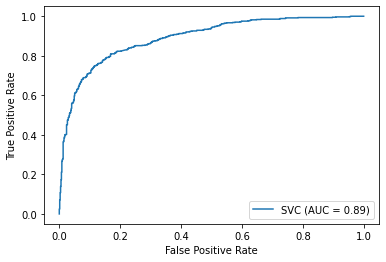

In [17]:
print("\n\n\nKernel: {} C: {}".format('poly', 0.3))
print("----------MODEL TRAINING & VALIDATION-------")
clf = SVC(kernel='poly', C=0.3,probability=True)
clf.fit(X_train, Y_train)
y_train_pred = clf.predict(X_train)
y_val_pred = clf.predict(X_val)
print("Train ACC: {:.5%}".format(accuracy_score(Y_train, y_train_pred)))
print("Val ACC: {:.5%}".format(accuracy_score(Y_val, y_val_pred)))
print("Train LL: {:.5}".format(log_loss(Y_val, y_val_pred)))
print("Val LL: {:.5}".format(log_loss(Y_val, y_val_pred)))
print("Confusion Matrix \n{}".format(confusion_matrix(Y_val, y_val_pred)))
print("Classification Report \n{}".format(
    classification_report(Y_val, y_val_pred)))
print("----------MODEL TESTING-------")
y_test_pred = clf.predict(X_test)
print("Test ACC: {:.5%}".format(accuracy_score(Y_test, y_test_pred)))
print("Test LL: {:.5}".format(log_loss(Y_test, y_test_pred)))
print("Confusion Matrix \n{}".format(confusion_matrix(Y_test, y_test_pred)))
print("Classification Report \n{}".format(
    classification_report(Y_test, y_test_pred)))

from sklearn import metrics
metrics.plot_roc_curve(clf, X_test, Y_test)

Name: AdaBoostClassifier
Name: BernoulliNB
Name: KNeighborsClassifier
Name: LinearDiscriminantAnalysis
Name: LogisticRegression
Name: MLPClassifier
Name: QuadraticDiscriminantAnalysis
Name: RandomForestClassifier
Name: SVC


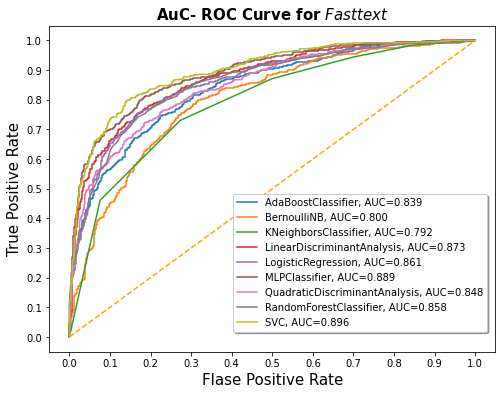

In [33]:
## ref : stackoverlfow curve plot tutorial
from sklearn.metrics import roc_curve, roc_auc_score
result_table = []
for name in all_classifiers:
    if name =="BaggingClassifier" or name =="DecisionTreeClassifier":
        continue
    print("Name: {}".format(name))
    clf = all_classifiers[name]
    y_test_pred = clf.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_test,y_test_pred)
    auc = roc_auc_score(Y_test, y_test_pred)
    result_table.append({'classifier':name,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc})

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))

for clf in result_table:
    plt.plot(clf['fpr'], 
             clf['tpr'], 
             label="{}, AUC={:.3f}".format(clf['classifier'], clf['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('AuC- ROC Curve for $Fasttext$', fontweight='bold', fontsize=15)
# plt.legend(prop={'size':13}, loc='lower right')
legend_x = 0.4
legend_y = 0.5
plt.legend(ncol=1,
           fancybox=True,
           shadow=True,
           bbox_to_anchor=(legend_x, legend_y))

# plt.show()
plt.savefig(os.path.join("results","fasttext_raw_roc"))

Name: AdaBoostClassifier
Name: BernoulliNB
Name: KNeighborsClassifier
Name: LinearDiscriminantAnalysis
Name: LogisticRegression
Name: MLPClassifier
Name: QuadraticDiscriminantAnalysis
Name: RandomForestClassifier
Name: SVC


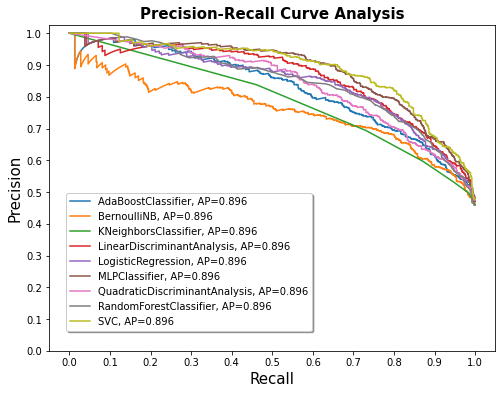

In [31]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

result_table = []
for name in all_classifiers:
    if name =="BaggingClassifier" or name =="DecisionTreeClassifier":
        continue
    print("Name: {}".format(name))
    clf = all_classifiers[name]
    y_test_pred = clf.predict_proba(X_test)[::,1]
    precision, recall, _ = precision_recall_curve(Y_test, y_test_pred)
    ap = average_precision_score(Y_test, y_test_pred)
    result_table.append({'classifier':name,
                                        'p':precision, 
                                        'r':recall, 
                                        'ap':auc})

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))

for clf in result_table:
    plt.plot(clf['r'], 
             clf['p'], 
             label="{}, AP={:.3f}".format(clf['classifier'], clf['ap']))
    
# plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Recall", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("Precision", fontsize=15)

plt.title('Precision-Recall Curve Analysis', fontweight='bold', fontsize=15)
# plt.legend(prop={'size':13}, loc='lower right')
legend_x = 0.6
legend_y = 0.5
plt.legend(ncol=1,
           fancybox=True,
           shadow=True,
           bbox_to_anchor=(legend_x, legend_y))

# plt.show()
plt.savefig(os.path.join("results","fasttext_raw_pr"))